# 20 - Estimateurs Plug-and-Play

Jusqu'à présent, nous avons vu comment corriger les biais dans les données lorsque le traitement n'est pas attribué de manière aléatoire, ce qui entraîne un biais de confusion. Cela nous aide avec le problème d'identification en inférence causale. Autrement dit, une fois que les unités sont interchangeables, ou $ Y(0), Y(1) \perp X$, il devient possible d'apprendre l'effet du traitement. Mais nous sommes loin d'avoir terminé.

L'identification signifie que nous pouvons trouver l'effet moyen du traitement. Autrement dit, nous savons à quel point un traitement est efficace en moyenne. Bien sûr, cela est utile, car cela nous aide à décider si nous devons déployer un traitement ou non. Mais nous voulons plus que cela. Nous voulons savoir s'il existe des sous-groupes d'unités qui réagissent mieux ou moins bien au traitement. Cela devrait permettre une politique beaucoup plus efficace, où nous ne traitons que ceux qui en bénéficieront.

## Cadrage du problème

Rappelons notre configuration d'intérêt. Étant donné les résultats potentiels, nous pouvons définir l'effet du traitement individuel comme la différence entre les résultats potentiels.

$
\tau_i = Y_i(1) − Y_i(0),
$

ou, dans le cas du traitement continu, $\tau_i = \partial Y(t)$, où $t$ est la variable de traitement. Bien sûr, nous ne pouvons jamais observer l'effet du traitement individuel, car nous ne voyons que l'un des résultats potentiels

$
Y^{obs}_i(t)= 
\begin{cases}
Y_i(1), & \text{si } t=1\\
Y_i(0), & \text{si } t=0
\end{cases}
$

Nous pouvons définir l'effet moyen du traitement (ATE) comme

$
\tau = E[Y_i(1) − Y_i(0)] = E[\tau_i]
$

et l'effet moyen du traitement conditionnel (CATE) comme

$
\tau(x) = E[Y_i(1) − Y_i(0)|X] = E[\tau_i|X]
$

Dans la Partie I de ce livre, nous avons principalement abordé l'ATE. Maintenant, nous nous intéressons au CATE. Le CATE est utile pour personnaliser un processus de décision. Par exemple, si vous avez un médicament comme traitement $t$, vous voulez savoir quels types de patients sont plus réactifs au médicament (CATE plus élevé) et s'il existe des types de patients avec une réponse négative (CATE < 0).

Nous avons vu comment estimer le CATE en utilisant une régression linéaire avec des interactions entre le traitement et les caractéristiques

$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i + e_i.
$

Si nous estimons ce modèle, nous pouvons obtenir des estimations pour $\tau(x)$

$
\hat{\tau}(x) = \hat{\beta}_1 + \hat{\beta}_3 X_i
$

Cependant, les modèles linéaires ont certains inconvénients. Le principal étant l'hypothèse de linéarité sur $X$. Notez que vous ne vous souciez même pas de $\beta_2$ dans ce modèle. Mais si les caractéristiques $X$ n'ont pas une relation linéaire avec le résultat, vos estimations des paramètres causaux $\beta_1$ et $\beta_3$ seront incorrectes.

Il serait idéal de remplacer le modèle linéaire par un modèle de machine learning plus flexible. Nous pourrions même intégrer le traitement en tant que caractéristique dans un modèle de machine learning, comme les arbres boostés ou un réseau de neurones

$
y_i = M(X_i, T_i) + e_i
$

mais à partir de là, il n'est pas clair comment nous pouvons obtenir des estimations de l'effet du traitement, car ce modèle produira des prédictions $\hat{y}$, et non des prédictions $\hat{\tau(x)}$. Idéalement, nous utiliserions un modèle de régression de machine learning qui, au lieu de minimiser l'erreur quadratique moyenne du résultat

$
E[(Y_i - \hat{Y}_i)^2]
$

minimiserait l'erreur quadratique moyenne de l'effet du traitement

$
E[(\tau(x)_i - \hat{\tau}(x)_i)^2] = E[(Y_i(1) - Y_i(0) - \hat{\tau}(x)_i)^2].
$

Cependant, ce critère est ce que nous appelons infaisable. Encore une fois, le problème ici est que $\tau(x)_i$ n'est pas observable, donc nous ne pouvons pas l'optimiser directement. Cela nous met dans une situation difficile... Essayons de simplifier un peu et peut-être nous trouverons une solution.

## Transformation de la cible

Supposons que votre traitement soit binaire. Disons que vous êtes une entreprise d'investissement testant l'efficacité de l'envoi d'un email d'éducation financière. Vous espérez que l'email incitera les gens à investir davantage. Supposons également que vous avez mené une étude randomisée où 50 % des clients ont reçu l'email et les 50 % restants ne l'ont pas reçu.

Voici une idée surprenante : transformons la variable de résultat en la multipliant par le traitement.

$
Y^*_i = 2 Y_i * T_i - 2 Y_i*(1-T_i)
$

Donc, si l'unité a été traitée, vous prenez le résultat et le multipliez par 2. Si elle n'a pas été traitée, vous prenez le résultat et le multipliez par -2. Par exemple, si l'un de vos clients a investi 2000 BRL et a reçu l'email, la cible transformée serait 4000. Cependant, s'il ou elle n'a pas reçu l'email, ce serait -4000.

Cela peut sembler très étrange, car vous indiquez que l'effet de l'email peut être un nombre négatif, mais suivez-moi. Si nous faisons un peu de mathématiques, nous pouvons voir qu'en moyenne ou en espérance, cette cible transformée sera l'effet du traitement. C'est tout simplement incroyable. Ce que je dis, c'est qu'en appliquant cette transformation quelque peu étrange, j'obtiens une estimation de quelque chose que je ne peux même pas observer.

Pour comprendre cela, nous avons besoin d'un peu de mathématiques. En raison de l'attribution aléatoire, nous avons $T \perp Y(0), Y(1)$, ce qui est notre vieil ami de l'absence de confusion. Cela implique que $E[T, Y(t)]=E[T]*E[Y(t)]$, ce qui est la définition de l'indépendance.

De plus, nous savons que

$
Y_i*T_i = Y(1)_i*T_i \text{ et }  Y_i*(1-T_i) = Y(0)_i*T_i
$

parce que le traitement est ce qui matérialise l'un ou l'autre des résultats potentiels. Avec cela à l'esprit, prenons la valeur attendue de $Y^*_i$ et voyons ce que nous obtenons.

$
\begin{align}
E[Y^*_i|X_i=x] &= E[2 Y(1)_i * T_i - 2 Y(0)_i*(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i * T_i | X_i=x] - 2E[Y(0)_i*(1-T_i)|X_i=x]\\
&= 2E[Y(1)_i| X_i=x] * E[ T_i | X_i=x] - 2E[Y(0)_i| X_i=x]*E[(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i| X_i=x] * 0.5 - 2E[Y(0)_i| X_i=x]*0.5 \\ 
&= E[Y(1)_i| X_i=x] - E[Y(0)_i| X_i=x] \\
&= \tau(x)_i
\end{align}
$

Donc, cette idée apparemment folle s'est avérée être une estimation sans biais de l'effet du traitement individuel $\tau(x)_i$. Maintenant, nous pouvons remplacer notre critère d'optimisation infaisable par

$
E[(Y^*_i - \hat{\tau}(x)_i)^2]
$

En termes plus simples, tout ce que nous avons à faire est d'utiliser un modèle de régression de machine learning pour prédire $Y^*_i$, et ce modèle fournira des prédictions de l'effet du traitement.

Maintenant que nous avons résolu le cas simple, qu'en est-il du cas plus compliqué, où le traitement n'est pas 50% 50%, ou même pas attribué de manière aléatoire ? En fait, la réponse est un peu plus compliquée, mais pas beaucoup. Tout d'abord, si nous n'avons pas d'attribution aléatoire, nous avons besoin au moins d'une indépendance conditionnelle $T \perp Y(1), Y(0) | X$. C'est-à-dire qu'en contrôlant pour $X$, $T$ est aussi bon que aléatoire. Avec cela, nous pouvons généraliser la cible transformée à

$
Y^*_i = Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}
$

où $e(X_i)$ est le score de propension. Donc, si le traitement n'est pas 50% 50%, mais randomisé avec une probabilité différente $p$, tout ce que vous avez à faire est de remplacer le score de propension dans la formule ci-dessus par $p$. Si le traitement n'est pas aléatoire, alors vous devez utiliser le score de propension, soit stocké, soit estimé.

Si vous prenez l'espérance de cela, vous verrez qu'il correspond également à l'effet du traitement. La preuve est laissée en exercice pour le lecteur. Je plaisante, la voici. Elle est un peu compliquée, alors n'hésitez pas à la passer.

$
\begin{align}
E[Y^*_i|X_i=x] &= E\big[Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big] \\
&= E\big[Y_i T_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))} + Y_i (1-T_i) * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= E\big[Y(1)_i * \dfrac{T_i(1 - e(X_i))}{e(X_i)(1-e(X_i))} | X_i=x\big] - E\big[Y(0)_i * \dfrac{(1-T_i)e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i * T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i * (1-T_i)| X_i=x]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i|X_i=x] * E[T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i|X_i=x] * E[(1-T_i)| X_i=x]\\
&= E[Y(1)_i|X_i=x] - E[Y(0)_i|X_i=x]\\
&= \tau(x)_i
\end{align}
$

Comme toujours, je pense que cela deviendra beaucoup plus concret avec un exemple. Encore une fois, considérez les emails d'investissement que nous avons envoyés pour inciter les gens à investir davantage. La variable de résultat est binaire (a investi vs n'a pas investi) `converti`.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nb21 import cumulative_gain, elast

In [2]:
email = pd.read_csv("./data/invest_email_rnd.csv")
email.head()

,age,income,insurance,invested,em1,em2,em3,converted
0,44.1,5483.80,6155.29,14294.81,0,1,1,0
1,39.8,2737.92,50069.40,7468.15,1,0,0,0
2,49.0,2712.51,5707.08,5095.65,1,0,1,1
3,39.7,2326.37,15657.97,6345.20,1,1,1,0
4,35.3,2787.26,27074.44,14114.86,1,1,1,0


Notre objectif ici est de personnaliser l'approche. Concentrons-nous sur l'email-1. Nous souhaitons l'envoyer uniquement aux clients qui y répondront le mieux. En d'autres termes, nous souhaitons estimer l'effet moyen du traitement conditionnel de l'email-1

$
E[Converti(1)_i - Converti(0)_i|X_i=x] = \tau(x)_i
$

afin de cibler les clients qui auront la meilleure réponse à l'email (CATE plus élevé).

Mais d'abord, divisons notre ensemble de données en un ensemble d'entraînement et un ensemble de validation. Nous allons estimer $\tau(x)_i$ sur un ensemble et évaluer les estimations sur l'autre.

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
train, test = train_test_split(email, test_size=0.4)
print(train.shape, test.shape)

(9000, 8) (6000, 8)


Maintenant, nous allons appliquer la transformation de la cible que nous venons d'apprendre. Puisque les emails ont été attribués de manière aléatoire (bien que pas sur une base de 50% 50%), nous n'avons pas besoin de nous préoccuper du score de propension. Celui-ci est constant et égal à la probabilité de traitement.

In [4]:
y = "converted"
T = "em1"
X = ["age", "income", "insurance", "invested"]

ps = train[T].mean()

y_star_train = train[y] * (train[T] - ps)/(ps*(1-ps))

Avec la cible transformée, nous pouvons choisir n'importe quel algorithme de régression en ML pour la prédire. Utilisons ici des arbres boostés.

In [5]:
from lightgbm import LGBMRegressor

np.random.seed(123)
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)
cate_learner.fit(train[X], y_star_train);

Ce modèle peut maintenant estimer $\tau(x)_i$. En d'autres termes, ce qu'il produit est $\hat{\tau}(x)_i$. Par exemple, si nous faisons des prédictions sur l'ensemble de test, nous verrons que certaines unités ont un CATE plus élevé que d'autres. Par exemple, le client 6958 a un CATE de 0,1, ce qui signifie que la probabilité qu'il ou elle achète notre produit d'investissement est prédite pour augmenter de 0,1 si nous envoyons l'email à ce client. En revanche, pour le client 3903, la probabilité d'acheter le produit est prédite pour n'augmenter que de 0,04.

In [6]:
test_pred = test.assign(cate=cate_learner.predict(test[X]))
test_pred.head()

,age,income,insurance,invested,em1,em2,em3,converted,cate
6958,40.9,4486.14,37320.33,12559.25,0,0,1,0,0.105665
7534,42.6,6386.19,13270.47,29114.42,0,0,1,0,0.121922
2975,47.6,1900.26,25588.72,2420.39,0,0,1,0,0.034161
3903,41.0,5802.19,57087.37,20182.20,1,0,1,1,0.046805
8437,49.1,2202.96,5050.81,9245.88,1,0,1,0,-0.009099


Pour évaluer la qualité de ce modèle, nous pouvons afficher les courbes de gain cumulatif, à la fois pour les ensembles d'entraînement et de test.

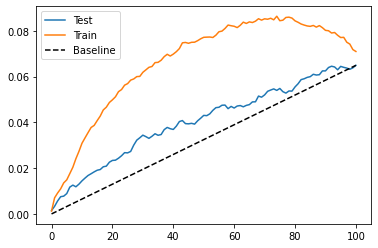

In [7]:
gain_curve_test = cumulative_gain(test_pred, "cate", y="converted", t="em1")
gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[X])), "cate", y="converted", t="em1")
plt.plot(gain_curve_test, color="C0", label="Test")
plt.plot(gain_curve_train, color="C1", label="Train")
plt.plot([0, 100], [0, elast(test, "converted", "em1")], linestyle="--", color="black", label="Baseline")
plt.legend();

Comme nous pouvons le voir, cet estimateur plug-and-play est meilleur que le hasard sur l'ensemble de test. Cependant, il semble qu'il souffre d'un surapprentissage important, car la performance sur l'ensemble d'entraînement est bien meilleure que celle sur l'ensemble de test.

C'est en fait l'un des plus grands inconvénients de cette technique de transformation de la cible. Avec cette transformation de la cible, vous obtenez beaucoup de simplicité, car vous pouvez simplement transformer la cible et utiliser n'importe quel estimateur de ML pour prédire les effets de traitement hétérogènes. Le coût de cette simplicité est que vous obtenez beaucoup de variance. Cela est dû au fait que la cible transformée est une estimation très bruyante de l'effet de traitement individuel, et cette variance se répercute sur votre estimation. C'est un problème majeur si vous ne disposez pas de beaucoup de données, mais cela devrait être moins problématique dans les applications de big data, où vous travaillez avec plus de 1 million d'échantillons.

## Le Cas du Traitement Continu

![img](./data/img/plug-and-play-estimators/second-estimator.png)

Un autre inconvénient évident de la méthode de transformation de la cible est qu'elle ne fonctionne que pour les traitements discrets ou binaires. C'est quelque chose que l'on observe fréquemment dans la littérature sur l'inférence causale. La plupart des recherches sont menées pour le cas du traitement binaire, mais on trouve peu de choses sur les traitements continus. Cela m'a beaucoup dérangé, car dans l'industrie, les traitements continus sont omniprésents, principalement sous forme de prix qu'il faut optimiser. Donc, même si je n'ai rien trouvé concernant les transformations de cibles pour les traitements continus, j'ai conçu quelque chose qui fonctionne en pratique. Gardez simplement à l'esprit que je n'ai pas une recherche économétrique très solide autour de cela.

Pour illustrer cela, revenons à l'exemple des ventes de crème glacée. Dans cet exemple, nous devions estimer l'élasticité de la demande par rapport au prix afin de mieux fixer les prix des glaces pour optimiser nos revenus. Rappelons que l'échantillon d'événements dans le jeu de données est un jour, et nous souhaitons savoir quand les gens sont moins sensibles aux augmentations de prix. Rappelons également que les prix sont attribués de manière aléatoire dans ce jeu de données, ce qui signifie que nous n'avons pas besoin de nous inquiéter du biais de confusion.

In [8]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
prices_rnd.head()

,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


Comme avant, commençons par séparer nos données en un ensemble d'entraînement et un ensemble de test.

In [9]:
np.random.seed(123)
train, test = train_test_split(prices_rnd, test_size=0.3)
train.shape, test.shape

((3500, 5), (1500, 5))

Maintenant, il est temps d'être un peu créatif. Pour le cas discret, l'effet moyen du traitement conditionnel est déterminé par la variation du résultat lorsque l'on passe du non-traité au traité, en fonction des caractéristiques des unités $X$.

$$
\tau(x) = E[Y_i(1) − Y_i(0)|X] = E[\tau_i|X]
$$

En termes simples, cela revient à estimer l'impact du traitement sur différents profils d'unités, où les profils sont définis en utilisant les caractéristiques $X$. Pour le cas continu, nous n'avons pas cet interrupteur marche-arrêt. Les unités ne sont pas traitées ou non traitées. Elles sont toutes traitées, mais avec des intensités différentes. Par conséquent, nous ne pouvons pas parler de l'effet de l'administration du traitement. Nous devons plutôt parler en termes d'augmentation du traitement. En d'autres termes, nous voulons savoir comment le résultat changerait si nous augmentions le traitement d'une certaine quantité. C'est un peu comme estimer la dérivée partielle de la fonction de résultat $Y$ par rapport au traitement $t$. Et parce que nous voulons savoir cela pour chaque groupe (le CATE, pas l'ATE), nous conditionnons sur les caractéristiques $X$.

$$
\tau(x) = E[\partial Y_i(t)|X] = E[\tau_i|X]
$$

Comment pouvons-nous estimer cela ? Tout d'abord, considérons le cas simple où le résultat est linéaire par rapport au traitement. Supposons que vous ayez deux types de jours : les jours chauds (jaunes) et les jours froids (bleus). Les jours froids, les gens sont plus sensibles aux augmentations de prix. De plus, à mesure que le prix augmente, la demande diminue de manière linéaire.

![img](./data/img/plug-and-play-estimators/linear-case.png)

Dans ce cas, le CATE sera la pente de chaque courbe de demande. Ces pentes nous indiqueront de combien la demande chutera si nous augmentons le prix d'une certaine quantité. Si cette relation est effectivement linéaire, nous pouvons estimer ces élasticités avec le coefficient d'une simple estimation de régression linéaire sur les jours chauds et sur les jours froids séparément.

$$
\hat{\tau(x)} = Cov(Y_i, T_i)/Var(T_i) = \dfrac{\sum(Y_i- \bar{Y})(T_i - \bar{T})}{\sum (T_i - \bar{T})^2}
$$

Nous pouvons nous inspirer de cet estimateur et réfléchir à ce que cela pourrait être pour une unité individuelle. En d'autres termes, et si nous avions la même chose définie pour chaque jour ? Dans ma tête, cela ressemblerait à quelque chose comme ceci :

$$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - \bar{T})}{\sigma^2_T}
$$

En termes simples, nous transformons la cible originale en soustrayant la moyenne, puis nous la multiplions par le traitement, dont nous avons également soustrait la moyenne. Enfin, nous la divisons par la variance du traitement. Voilà, nous avons une transformation de cible pour le cas continu.

![img](./data/img/plug-and-play-estimators/genious.jpeg)

La question maintenant est : est-ce que ça marche ? En fait, oui, et nous pouvons passer en revue une démonstration similaire pour expliquer pourquoi ça fonctionne, tout comme nous l'avons fait dans le cas binaire. D'abord, appelons

$$
V_i = \dfrac{(T_i - \bar{T})}{\sigma^2_T}
$$

Remarquez que $E[V_i|X_i=x]=0$ car sous l'affectation aléatoire, $E[T_i|X_i=x]=\bar{T}$. En d'autres termes, pour chaque région de $X$, $E[T_i]=\bar{T}$. De plus, $E[T_i V_i | X_i=x]=1$ parce que $E[T_i(T_i - \bar{T})|X_i=x] = E[(T_i - \bar{T})^2|X_i=x]$, ce qui correspond à la variance du traitement. Enfin, sous l'indépendance conditionnelle (que nous obtenons automatiquement dans le cas d'une affectation aléatoire du traitement), $E[T_i e_i | X_i=x] = E[T_i | X_i=x] E[e_i | X_i=x]$.

Pour montrer que cette transformation de cible fonctionne, nous devons nous rappeler que nous estimons le paramètre pour un modèle linéaire local

$$
Y_i = \alpha + \beta T_i + e_i | X_i=x
$$

Dans notre exemple, ce seraient les modèles linéaires pour les jours chauds et les jours froids. Ici, nous nous intéressons au paramètre $\beta$, qui est notre élasticité conditionnelle ou CATE. Avec tout cela, nous pouvons prouver que

$$
\begin{align}
E[Y^*_i|X_i=x] &= E[(Y_i-\bar{Y})V_i | X_i=x] \\
&= E[(\alpha + \beta T_i + e_i - \bar{Y})V_i | X_i=x] \\
&= \alpha E[V_i | X_i=x] + \beta E[T_i V_i | X_i=x] + E[e_i V_i | X_i=x] \\
&= \beta + E[e_i V_i | X_i=x] \\
&= \beta = \tau(x)
\end{align}
$$

Gardez à l'esprit que cela ne fonctionne que lorsque le traitement est randomisé. Pour un traitement non randomisé, nous devons remplacer $\bar{T}$ par $M(X_i)$, où $M$ est un modèle qui estime $E[T_i|X_i=x]$.

$$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - M(T_i))}{(T_i - M(T_i))^2}
$$

Cela garantira que le terme $\alpha E[V_i | X_i=x]$ dans la troisième ligne s'annule et que le terme $E[T_i V_i | X_i=x]$ converge vers 1. Notez que vous n'avez pas vraiment besoin que $E[T_i V_i | X_i=x]$ converge vers 1 si vous souhaitez simplement classer les unités en fonction de l'effet du traitement. En d'autres termes, si vous voulez juste savoir quels jours la demande est plus sensible aux augmentations de prix, mais sans avoir besoin de savoir de combien, il n'est pas important que les estimations de $\beta$ soient amplifiées ou réduites. Dans ce cas, vous pouvez omettre le dénominateur.

$$
Y^*_i = (Y_i- \bar{Y})(T_i - M(T_i))
$$

Si tout ce calcul vous semble fastidieux, ne vous inquiétez pas. Le code est en réalité très simple. Encore une fois, nous transformons notre cible d'entraînement avec les formules vues ci-dessus. Ici, les affectations de traitement sont aléatoires, donc nous n'avons pas besoin de construire un modèle qui prédit les prix. J'omets également le dénominateur, car ici, je me concentre uniquement sur le classement de l'effet du traitement.

In [10]:
y_star_cont = (train["price"] - train["price"].mean()
               *train["sales"] - train["sales"].mean())

Comme avant, nous utilisons un modèle de régression pour prédire la variable cible.

In [11]:
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)

np.random.seed(123)
cate_learner.fit(train[["temp", "weekday", "cost"]], y_star_cont)

cate_test_transf_y = cate_learner.predict(test[["temp", "weekday", "cost"]])

test_pred = test.assign(cate=cate_test_transf_y)
test_pred.sample(5)

,temp,weekday,cost,price,sales,cate
2815,15.7,4,1.5,3,187,-1395.956278
257,29.4,3,1.0,3,209,-1607.400415
2585,24.6,6,1.0,10,197,-1497.197402
3260,20.2,1,0.5,4,246,-1629.798111
1999,10.0,4,0.5,10,139,-1333.690544


Cette fois, l'interprétation du CATE est moins intuitive. Comme nous avons retiré le dénominateur de la transformation de la cible, ce CATE que nous observons est mis à l'échelle par $Var(X)$. Cependant, cette prédiction devrait toujours bien classer l'effet du traitement. Pour le vérifier, nous pouvons utiliser la courbe de gain cumulatif, tout comme nous l'avons fait précédemment.

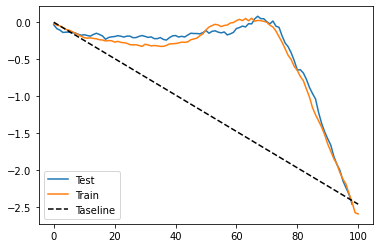

In [12]:
gain_curve_test = cumulative_gain(test.assign(cate=cate_test_transf_y),
                                "cate", y="sales", t="price")

gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[["temp", "weekday", "cost"]])),
                                   "cate", y="sales", t="price")


plt.plot(gain_curve_test, label="Test")
plt.plot(gain_curve_train, label="Train")
plt.plot([0, 100], [0, elast(test, "sales", "price")], linestyle="--", color="black", label="Taseline")
plt.legend();

Pour ces données, il semble que le modèle avec transformation de cible soit bien meilleur que le modèle aléatoire. De plus, les résultats d'entraînement et de test sont assez proches, donc la variance n'est pas un problème ici. Mais cela est spécifique à cet ensemble de données. Si vous vous souvenez, ce n'était pas le cas lorsque nous avons exploré le traitement binaire. Là, le modèle ne performait pas très bien.

### Effets Non Linéaires du Traitement

Après avoir discuté du cas continu, il y a encore un éléphant dans la pièce que nous devons aborder. Nous avons supposé une linéarité dans l'effet du traitement. Cependant, c'est très rarement une hypothèse raisonnable. En général, les effets du traitement se saturent d'une manière ou d'une autre. Dans notre exemple, il est raisonnable de penser que la demande diminuera plus rapidement au début de l'augmentation du prix, puis ralentira.

![img](./data/img/plug-and-play-estimators/non-linear-case.png)

Le problème ici est que **l'élasticité ou l'effet du traitement change avec le traitement lui-même**. Dans notre exemple, l'effet du traitement est plus intense au début de la courbe et plus faible à mesure que les prix augmentent. Supposons encore une fois que nous avons deux types de jours : les jours chauds (jaunes) et les jours froids (bleus), et que nous voulons les distinguer avec un modèle causal. Le problème est que les modèles causaux doivent prédire l'élasticité, mais dans le cas non linéaire, l'élasticité des jours chauds et froids pourrait être la même si nous regardons différents points de prix sur la courbe (image de droite).

Il n'y a pas de solution facile à ce problème et je confesse que je suis encore en train d'explorer ce qui fonctionne le mieux. Pour l'instant, ce que je fais, c'est essayer de réfléchir à la forme fonctionnelle de l'effet du traitement et d'une manière ou d'une autre de la linéariser. Par exemple, la demande a généralement la forme fonctionnelle suivante, où des valeurs plus élevées de $\alpha$ signifient que la demande diminue plus rapidement avec chaque augmentation de prix :

$$
D_i = \dfrac{1}{P_i^{\alpha}}
$$

Ainsi, si j'applique la transformation logarithmique à la fois à la demande $Y$ et aux prix $T$, je devrais obtenir quelque chose de linéaire.

$$
\begin{align}
\log(D)_i &= \log\bigg(\dfrac{1}{P_i^{\alpha}}\bigg) \\
&= \log(1) - \log(P_i^{\alpha}) \\
&= - \alpha \cdot \log(P_i) \\
\end{align}
$$

La linéarisation n'est pas facile à réaliser, car elle nécessite un certain raisonnement. Mais vous pouvez aussi essayer différentes approches et voir ce qui fonctionne le mieux. Souvent, des choses comme les logarithmes et les racines carrées aident.

## Idées Clés

Nous nous dirigeons maintenant vers l'estimation des effets de traitement conditionnels moyens en utilisant des modèles de machine learning. Le plus grand défi dans ce cas est d'adapter un modèle prédictif à un modèle qui estime des effets causaux. Une autre façon de le formuler est que les modèles prédictifs se concentrent sur l'estimation du résultat $Y$ en fonction des caractéristiques $X$ et éventuellement du traitement $T$ ($Y = M(X, T)$), tandis que les modèles causaux doivent estimer la dérivée partielle de cette fonction de sortie par rapport au traitement ($ \partial Y = \partial M(X, T) $). Cela n'est pas trivial, car bien que nous observions le résultat $Y$, nous ne pouvons pas observer $\partial Y$, du moins pas au niveau individuel. Par conséquent, nous devons être créatifs lors de la conception d'une fonction objective pour nos modèles.

Ici, nous avons vu une technique très simple de transformation de cible. L'idée est de combiner la cible originale $Y$ avec le traitement $T$ pour former une cible transformée qui est, en espérance, égale à la CATE. Avec cette nouvelle cible, nous pouvons utiliser n'importe quel modèle ML prédictif pour l'estimer, et les prédictions du modèle seront des estimations de CATE. À titre de remarque, en plus de la transformation de cible, cette méthode est également connue sous le nom de **F-Learner**.

Avec toute cette simplicité, il y a aussi un prix à payer. La cible transformée est une estimation très bruyante de l'effet du traitement individuel et ce bruit sera transféré aux estimations du modèle sous forme de variance. Cela rend la transformation de cible mieux adaptée aux applications de big data, où la variance est moins problématique en raison des tailles d'échantillons élevées. Un autre inconvénient de la méthode de transformation de cible est qu'elle est uniquement définie pour des traitements binaires ou catégoriques. Nous avons fait de notre mieux pour proposer une version continue de l'approche et avons même trouvé quelque chose qui semblait fonctionner, mais jusqu'à présent, il n'existe pas de cadre théorique solide pour la soutenir.

Enfin, nous avons terminé par une discussion sur les effets non linéaires du traitement et les défis qui en découlent. En effet, lorsque l'effet du traitement change avec le traitement lui-même, nous pourrions à tort penser que les unités ont la même courbe de réponse au traitement parce qu'elles ont la même réactivité au traitement, mais en réalité, elles reçoivent simplement des quantités de traitement différentes.


## Références

Les choses que j'ai écrites ici viennent principalement de ma propre expérience. Je les ai apprises par la pratique. Cela signifie qu'il n'y a pas de référence directe à laquelle je peux vous renvoyer. Cela signifie aussi que ce que j'ai écrit ici n'a **pas** été soumis à l'examen académique que la bonne science traverse souvent. Au lieu de cela, remarquez comment je parle de choses qui fonctionnent dans la pratique, mais je ne passe pas trop de temps à expliquer pourquoi cela est le cas. C'est une sorte de science de la rue, si vous voulez. Cependant, je mets cela à la disposition du public pour examen, donc, si vous trouvez quelque chose d'absurde, ouvrez un problème et je le traiterai au mieux de mes efforts.
 
La majeure partie de ce chapitre s'inspire de l'article de Susan Athey et Guido W. Imbens, *Machine Learning Methods for Estimating Heterogeneous Causal Effects*. Certains éléments concernant la transformation de cible se trouvent également dans l'article de Pierre Gutierrez et Jean-Yves Gérardy, *Causal Inference and Uplift Modeling: A Review of the Literature*. Notez que ces articles traitent uniquement des cas de traitement binaire. Une autre revue des modèles causaux pour l'estimation de CATE, qui fait référence au F-Learner, est *Meta-learners for Estimating Heterogeneous Treatment Effects using Machine Learning*, par Künzel et al., 2019.

 
## Contribuer

*L'Inférence Causale pour les Courageux et les Vrais* est un matériel open-source sur l'inférence causale, la statistique de la science. Son objectif est d'être accessible monétairement et intellectuellement. Il utilise uniquement des logiciels gratuits basés sur Python.
Si vous avez trouvé ce livre précieux et souhaitez le soutenir, veuillez vous rendre sur [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). Si vous n'êtes pas prêt à contribuer financièrement, vous pouvez également aider en corrigeant les fautes de frappe, en suggérant des modifications ou en donnant votre avis sur les passages que vous n'avez pas compris. Rendez-vous sur le repo du livre et [ouvrez une issue](https://github.com/matheusfacure/python-causality-handbook/issues). Enfin, si vous avez aimé ce contenu, veuillez le partager avec d'autres personnes qui pourraient le trouver utile et lui donner une [étoile sur GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).